In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1630


<Axes: xlabel='Time'>

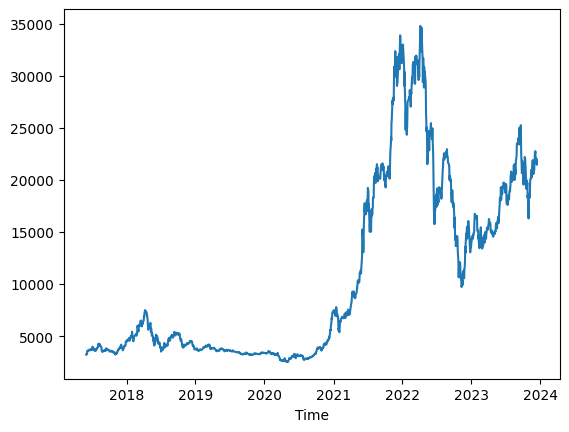

In [2]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [3]:
# Preprocessing
df = VND['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1630)
df['Lag2'] = df['Lag1'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2
1,2017-06-02,3280,1,0.0
2,2017-06-05,3280,2,1.0
3,2017-06-06,3320,3,2.0
4,2017-06-07,3590,4,3.0
5,2017-06-08,3540,5,4.0
...,...,...,...,...
1625,2023-12-11,21950,1625,1624.0
1626,2023-12-12,22050,1626,1625.0
1627,2023-12-13,21600,1627,1626.0
1628,2023-12-14,21450,1628,1627.0


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2']]).reshape(-1, 2)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2']]).reshape(-1, 2)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([16798.0818283 , 16821.83822978, 16845.59463127, 16869.35103275,
       16893.10743424, 16916.86383572, 16940.62023721, 16964.37663869,
       16988.13304018, 17011.88944166, 17035.64584315, 17059.40224463,
       17083.15864612, 17106.9150476 , 17130.67144909, 17154.42785057,
       17178.18425206, 17201.94065354, 17225.69705503, 17249.45345651,
       17273.209858  , 17296.96625948, 17320.72266097, 17344.47906245,
       17368.23546394, 17391.99186542, 17415.74826691, 17439.50466839,
       17463.26106988, 17487.01747136, 17510.77387285, 17534.53027433,
       17558.28667582, 17582.0430773 , 17605.79947878, 17629.55588027,
       17653.31228175, 17677.06868324, 17700.82508472, 17724.58148621,
       17748.33788769, 17772.09428918, 17795.85069066, 17819.60709215,
       17843.36349363, 17867.11989512, 17890.8762966 , 17914.63269809,
       17938.38909957, 17962.14550106, 17985.90190254, 18009.65830403,
       18033.41470551, 18057.171107  , 18080.92750848, 18104.68390997,
      

In [7]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2]).reshape(-1, 2)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[20670.37527034 20694.13167182 20717.88807331 20741.64447479
 20765.40087628 20789.15727776 20812.91367925 20836.67008073
 20860.42648222 20884.1828837  20907.93928519 20931.69568667
 20955.45208816 20979.20848964 21002.96489113 21026.72129261
 21050.4776941  21074.23409558 21097.99049707 21121.74689855
 21145.50330004 21169.25970152 21193.01610301 21216.77250449
 21240.52890598 21264.28530746 21288.04170895 21311.79811043
 21335.55451192 21359.3109134  20658.4970696  20682.25347108
 20706.00987257 20729.76627405 20753.52267554 20777.27907702
 20801.03547851 20824.79187999 20848.54828148 20872.30468296
 20896.06108445 20919.81748593 20943.57388742 20967.3302889
 20991.08669039 21014.84309187 21038.59949336 21062.35589484
 21086.11229633 21109.86869781 21133.6250993  21157.38150078
 21181.13790227 21204.89430375 21228.65070524 21252.40710672
 21276.1635082  21299.91990969 21323.67631117 21347.43271266]


In [8]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 3756.8742489793794
Testing MAPE: 20.731785947612874
Testing MAE: 3121.26557258404
MSLR:  0.052697066415688665


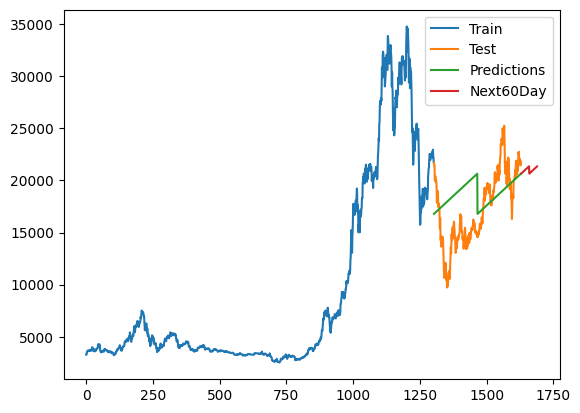

In [9]:
train_range = range(train_size)
test_range = range(train_size, train_size+test_size+1)

# 8.Visualize the result
plt.plot(train_range, train_data['Close'])
plt.plot(test_range, test_data['Close'])
plt.plot(test_range, y_pred)
plt.plot(range_arr_1,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()